In [110]:
from keras.utils import to_categorical
from keras import layers, models, optimizers ,Model
from keras.layers import Input 
def load_mnist():
    # the data, shuffled and split between train and test sets
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.
    y_train = to_categorical(y_train.astype('float32'))
    y_test = to_categorical(y_test.astype('float32'))
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_mnist()

In [2]:
from keras import backend as K
from keras.layers import Activation 
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return K.sigmoid(x)*x
get_custom_objects().update({'swish': Activation(swish )})

In [3]:
Autoencoder=models.Sequential()
Autoencoder.add(layers.Flatten(input_shape=(28, 28, 1)))
Autoencoder.add(layers.Dense(units=1024,activation='swish'))
Autoencoder.add(layers.Dropout(0.3))
Autoencoder.add(layers.Dense(units=256,activation='swish'))
Autoencoder.add(layers.Dropout(0.4))
Autoencoder.add(layers.Dense(units=64,activation='swish'))
Autoencoder.add(layers.Dropout(0.5))
Autoencoder.add(layers.Dense(units=16,activation='swish'))
Autoencoder.add(layers.Dense(units=4,activation='tanh'))
Autoencoder.add(layers.BatchNormalization())
Autoencoder.add(layers.Dense(units=16,activation='swish'))
Autoencoder.add(layers.Dense(units=64,activation='swish'))
Autoencoder.add(layers.Dense(units=256,activation='swish'))
Autoencoder.add(layers.Dense(units=512,activation='swish'))
Autoencoder.add(layers.Dense(units=784,activation='relu'))
Autoencoder.add(layers.Reshape((28,28,1)))

In [4]:
Autoencoder.compile(loss='mse',optimizer='Adam')

In [26]:
Autoencoder.fit(x_train,x_train,epochs=200,batch_size=800)

Epoch 1/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0276
Epoch 2/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0276
Epoch 3/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0275
Epoch 4/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0277
Epoch 5/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0275
Epoch 6/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0275
Epoch 7/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0274
Epoch 8/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0276
Epoch 9/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0275
Epoch 10/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0274
Epoch 11/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0275: 0s 
Epoch 12/200
60000/60000 [==========

60000/60000 [==============================] - 1s 16us/step - loss: 0.0268
Epoch 95/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0268
Epoch 96/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0267
Epoch 97/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0268
Epoch 98/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0269
Epoch 99/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0268
Epoch 100/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0267
Epoch 101/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0267
Epoch 102/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0267: 0s 
Epoch 103/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0268
Epoch 104/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0269
Epoch 105/200
60000/60000 [========

60000/60000 [==============================] - 1s 16us/step - loss: 0.0264
Epoch 187/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0264
Epoch 188/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0263
Epoch 189/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0264
Epoch 190/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0264
Epoch 191/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0263
Epoch 192/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0264
Epoch 193/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0263
Epoch 194/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0263
Epoch 195/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0263
Epoch 196/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0264
Epoch 197/200
60000/60000 [========

In [115]:
xx_test=x_test
xx_test[:,0:14,:,:]=0

64


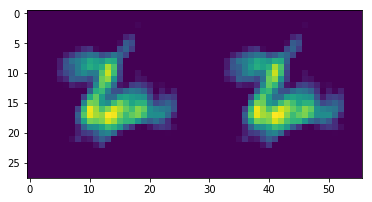

In [125]:
pnum = input()
pnum = int(pnum)
x_recon = Autoencoder.predict(x_test, batch_size=20)
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
reco = x_recon[pnum,:,:]*255
reco = numpy.reshape(reco,(28,28))
#plt.imshow(reco)
x_recon1 = Autoencoder.predict(xx_test, batch_size=20)
reco1 = x_recon1[pnum,:,:]*255
reco1 = numpy.reshape(reco1,(28,28))
#plt.imshow(reco1)
p = numpy.column_stack((reco,reco1))
plt.imshow(p)

In [7]:
encoded_input = Input(shape=(4,))
decoder = Autoencoder.layers[-6](encoded_input)
decoder = Autoencoder.layers[-5](decoder)
decoder = Autoencoder.layers[-4](decoder)
decoder = Autoencoder.layers[-3](decoder)
decoder = Autoencoder.layers[-2](decoder)
decoder = Autoencoder.layers[-1](decoder)
Decoder = Model(encoded_input, decoder)

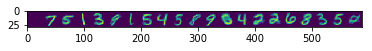

In [160]:
def showw():
    p=numpy.zeros((28,28))
    for i in range(20):
        a=numpy.random.random((1,4))*6-3
        reco=Decoder.predict(a)
        reco=numpy.reshape(reco,(28,28))
        p = numpy.column_stack((p,reco))
    plt.imshow(p)
showw()

In [71]:
Big=models.Sequential()
Big.add(layers.Flatten(input_shape=(28, 28, 1)))
Big.add(layers.AlphaDropout(0.5))
Big.add(layers.Dense(units=512,activation='swish'))
Big.add(layers.AlphaDropout(0.5))
Big.add(layers.Dense(units=512,activation='swish'))
Big.add(layers.AlphaDropout(0.5))
Big.add(layers.Dense(units=3136,activation='swish'))
Big.add(layers.Dropout(0.3))
Big.add(layers.Reshape((56,56,1)))
Big.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='swish',padding='same'))
Big.add(layers.Dropout(0.3))
Big.add(layers.MaxPool2D())
Big.add(layers.Conv2D(filters=1,kernel_size=(3,3),activation='relu',padding='same'))

In [72]:
Big.model.summary()

AttributeError: 'NoneType' object has no attribute 'summary'

In [73]:
Big.compile(optimizer='Adam', loss='msle')
Big.fit(x_train, x_train,
                epochs=2,
                batch_size=150,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 54s 907us/step - loss: 0.0326 - val_loss: 0.1070
Epoch 2/2
60000/60000 [==============================] - 54s 897us/step - loss: 0.0289 - val_loss: 0.0632


In [74]:
encoded_input = Input(shape=(28,28,1,))
bigger = Big.layers[0](encoded_input)
bigger = Big.layers[1](bigger)
bigger = Big.layers[2](bigger)
bigger = Big.layers[3](bigger)
bigger = Big.layers[4](bigger)
bigger = Big.layers[5](bigger)
bigger = Big.layers[6](bigger)
bigger = Big.layers[7](bigger)
bigger = Big.layers[8](bigger)
Bigger = Model(encoded_input, bigger)

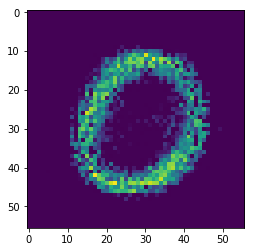

In [76]:
x_recon = Bigger.predict(x_test, batch_size=20)
x_recon.shape
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
reco=x_recon[13,:,:]*255
reco=numpy.reshape(reco,(56,56))
plt.imshow(reco)